# Week 2: Small worlds and weak ties

This week we will showcase the Watts-Strogatz random graph model and show how it compares with the random graph model at reproducing the statistics of real world networks.

## Packages used:
* networkx
* matplotlib
* numpy

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")

## What do Watts-Strogatz Graphs look like?

How does the value of the different parameters *n*, *k* and *p*, affect the structure of graph that we see? If you're trying this on your own, have a play around with the parameters, particularly the values of *p*.

Average clustering coefficient: 0.067738 
Average shortest path length: 2.764103
Diameter: 5


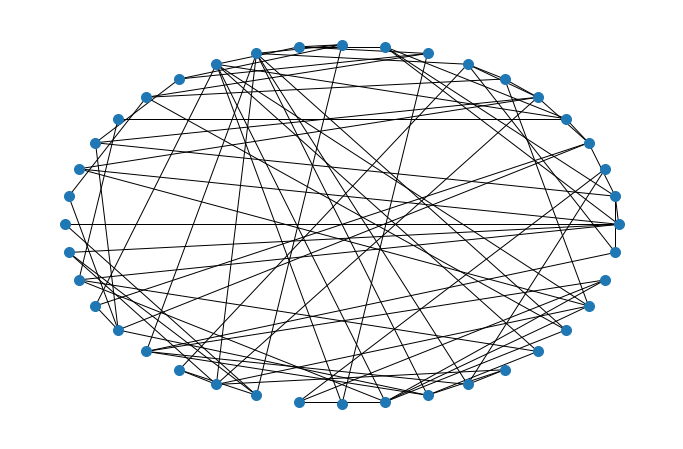

In [64]:
n = 40
k = 5
p = 0.8

fig, ax = plt.subplots(figsize=(12,8))

G = nx.watts_strogatz_graph(n,k,p)
nx.draw_circular(G,node_size=100, ax=ax)

clustering = nx.average_clustering(G)
avg_path_length = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)

print("Average clustering coefficient: %f " %clustering)
print("Average shortest path length: %f" %avg_path_length)
print("Diameter: %d"%diameter)

## Small version of Watts-Strogatz experiment

Network of size 100 nodes with k=4, repeated 5 times

In [65]:
n = 100
k = 4

clusters = np.zeros((5,100),dtype=float)
pl = np.zeros((5,100),dtype=int)
probs = np.linspace(0.01,1.0,100)

for j in range(5):
    for i in range(100):
        p = probs[i]
        G = nx.watts_strogatz_graph(n,k,p)
        clusters[j,i]=nx.average_clustering(G)
        pl[j,i]=nx.average_shortest_path_length(G)
        
avg_clusters=np.mean(clusters,axis=0)
avg_pl = np.mean(pl,axis=0)

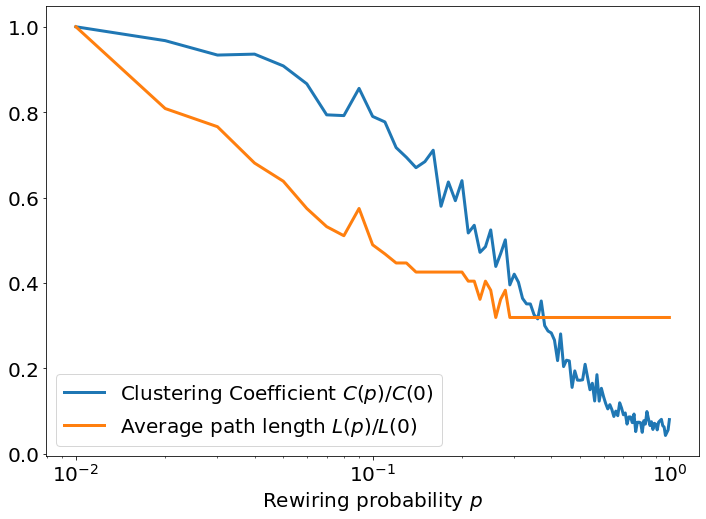

In [66]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
c0, p0 = avg_clusters[0], avg_pl[0]
normalised_clusters = avg_clusters/float(c0)
normalised_pl = avg_pl/float(p0)

plt.xscale('log')
plt.xlabel('Rewiring probability $p$', fontsize=20)
plt.tick_params(labelsize=20)

plt.plot(probs,normalised_clusters,label='Clustering Coefficient $C(p)/C(0)$',linewidth=3)
plt.plot(probs,normalised_pl,label='Average path length $L(p)/L(0)$',linewidth=3)

plt.legend(loc= 'lower left',fontsize=20)
plt.show()

## Example: Zachary's Karate Club Social Graph

How does a Watts-Strogatz graph with a similar number of nodes and edges to the Karate Club graph compare with the real graph?

In [67]:
df = pd.read_csv("../Week1/lotr.csv",names = ["source","target","time"], sep=",")

G_whole = nx.from_pandas_edgelist(df)
largest_cc = max(nx.connected_components(G_whole), key=len)
G = G_whole.subgraph(largest_cc).copy()

no_nodes = len(G.nodes())
no_edges = len(G.edges())
k_avg = 2.0*no_edges/no_nodes

In [75]:
p = 0.1

H = nx.watts_strogatz_graph(no_nodes,round(k_avg),p)

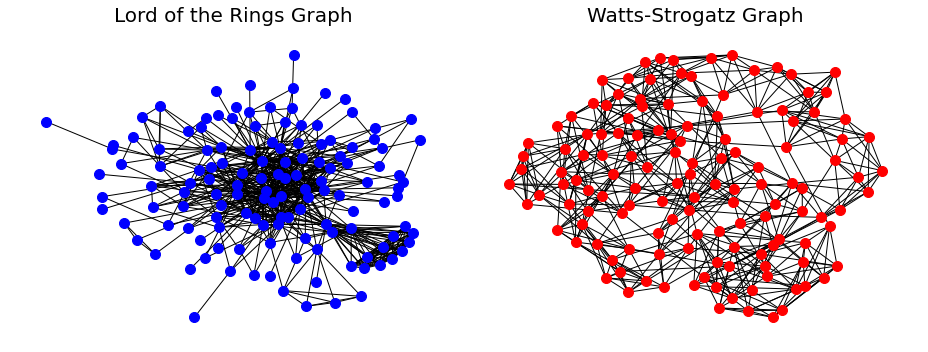

In [76]:
# set up plot
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(13,5))

# draw karate club graph
ax[0].set_title("Lord of the Rings Graph",fontsize=20)
pos1 = nx.kamada_kawai_layout(G)
nx.draw(G,pos1,node_size=100,node_color='blue', ax=ax[0])

# draw random graph of same size and density
pos2 = nx.kamada_kawai_layout(H)
ax[1].set_title("Watts-Strogatz Graph",fontsize=20)
nx.draw(H,pos2,node_size=100,ax=ax[1],node_color="red")

plt.tight_layout()
plt.show()

## Degree-based statistics

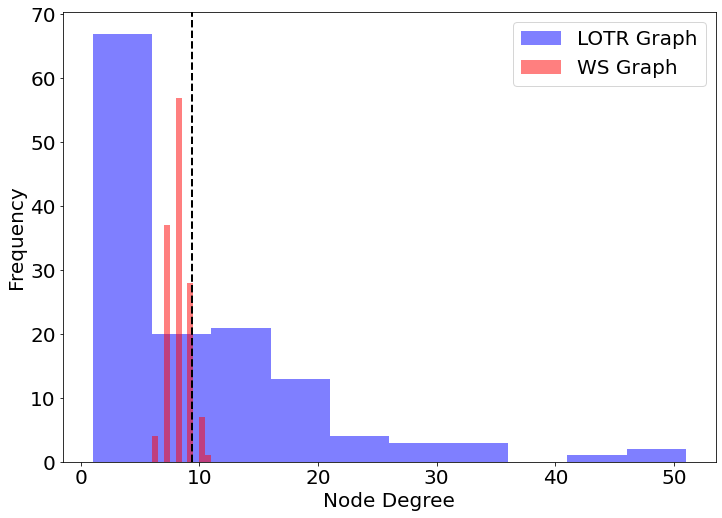

In [77]:
degrees_G = [d for n, d in G.degree()]
degrees_H = [d for n, d in H.degree()]

avg_deg = 2.0 * no_edges/no_nodes

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Node Degree',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(labelsize=20)

plt.axvline(x=avg_deg, linewidth=2, linestyle='--', color='black')

plt.hist(degrees_G,label="LOTR Graph",alpha=0.5,color='blue')
plt.hist(degrees_H,label='WS Graph',alpha=0.5,color='red')
plt.legend(loc='upper right',fontsize=20)
plt.show()

## Clustering coefficient

How does the node and average clustering coefficient compare between the real and random graph? The code below computes the clustering coefficients for each graph

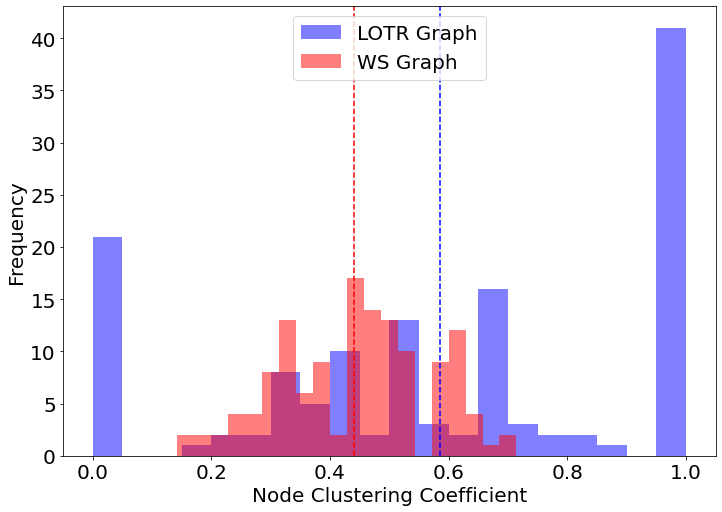

In [78]:
clusters_G = list(nx.clustering(G).values())
avg_cluster_G = sum(clusters_G)/float(no_nodes)
clusters_H = list(nx.clustering(H).values())
avg_cluster_H = sum(clusters_H)/float(no_nodes)

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Node Clustering Coefficient',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(labelsize=20)

plt.hist(clusters_G,bins=20,label="LOTR Graph",alpha=0.5,color='blue')
plt.hist(clusters_H,bins=20,label='WS Graph',alpha=0.5,color='red')

plt.axvline(x=avg_cluster_G, linestyle='--', color='blue')
plt.axvline(x=avg_cluster_H, linestyle='--', color='red')

plt.legend(loc='upper center',fontsize=20)

plt.show()

In [79]:
def get_path_lengths(graph):
    nodes = list(graph.nodes())
    lengths = []
    for i in range(len(nodes)):
        for j in range(i):
            lengths.append(len(nx.shortest_path(graph,nodes[i],nodes[j]))-1)
    return lengths

path_lengths_G = get_path_lengths(G)
path_lengths_H = get_path_lengths(H)

In [80]:
avg_path_G = sum(path_lengths_G)/float(len(path_lengths_G))
avg_path_H = sum(path_lengths_H)/float(len(path_lengths_H))

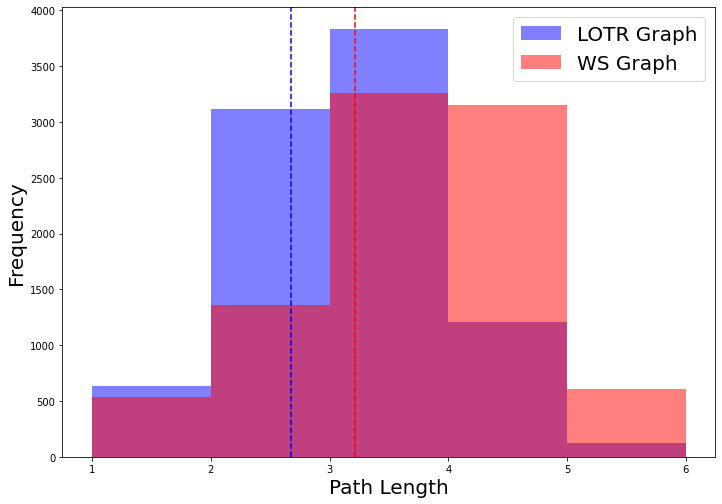

In [81]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Path Length',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

plt.hist(path_lengths_G,bins=5,label="LOTR Graph",alpha=0.5,color='blue')
plt.hist(path_lengths_H,bins=5,label='WS Graph',alpha=0.5,color='red')

plt.axvline(x=avg_path_G, linestyle='--', color='blue')
plt.axvline(x=avg_path_H, linestyle='--', color='red')

plt.legend(loc='upper right',fontsize=20)

plt.show()